## Electric Vehicle Data Analysis (Project 1_UCI_DABC)

![](https://static01.nyt.com/images/2021/05/15/business/00electric-cars/00electric-cars-videoSixteenByNine3000.jpg)

- Mainstream electic vehicles (EV) generally include electric motored powered propulstion system(s) that are powered by a collector system(s), and/or creating electricity throught the process of converting fossil fuel (Wikipedia, 2023).
- Internal combustion engines were the dominant propulsion method for cars and trucks for approximately 100 years; however, this data analysis exploration suggest that electric powered vehicles are trending to supercede fossil fule powered vehicles.

### PROJECT OUTINE

- Import libraries and their dependencies
- Read in the datasets
- Data preparation and sanitizaion
- Exploritory data analysis
- Ask and solve questions to form a hypothesis
- Plot techniques to illustrate the dataset(s) for visualization

In [127]:
# Setup
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
import hvplot.pandas
import gmaps

# Data files
registration_data_combined = "/Users/flynnlives/Documents/GitHub/UCI_Project_1/Registration_Files/Combined_Registrations.csv"
fuel_stations = "/Users/flynnlives/Documents/GitHub/UCI_Project_1/ele_fuel_stations (Aug 7 2023).csv"
EV_Prices = "/Users/flynnlives/Documents/GitHub/UCI_Project_1/Registration_Files/2022_EV_Prices.csv" 
zipcodes = "/Users/flynnlives/Documents/GitHub/UCI_Project_1/Registration_Files/zip_code_database.csv"


## Added by Shane, used to refer to relative path
# registration_data_combined = "../../Registration_Files/Combined_Registrations.csv"
# fuel_stations = "../../ele_fuel_stations (Aug 7 2023).csv"
# EV_Prices = "../2022_EV_Prices.csv" 
# zipcodes = "../zip_code_database.csv"

## About Dataset
This dataset shows the Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs) that are currently registered through the Washington State Department of Licensing (DOL).

1.A Battery Electric Vehicle (BEV) is an all-electric vehicle using one or more batteries to store the electrical energy that powers the motor and is charged by plugging the vehicle into an electric power source.

2 Alternative Fuel Vehicle (CAFV) Eligibility is based on the fuel requirement and electric-only range requirement as outlined in RCW 82.08.809 and RCW 82.12.809 to be eligible for Alternative Fuel Vehicles retail sales and Washington State use tax exemptions.

3.Monthly count of vehicles for a county may change from this report and prior reports. Processes were implemented to more accurately assign county at the time of registration.

4.Electric Range is no longer maintained for Battery Electric Vehicles (BEV) because new BEVs have an electric range of 30 miles or more. Zero (0) will be entered where the electric range has not been researched.

5.Field 'Electric Utility' was added starting with the publication in March 2022.

6.Field '2020 Census Tract' was added starting with the publication in June 2022.

In [82]:
# There is a clear shift in demand slope in EV registrations compared to fossil fuel vehicles

In [128]:
#Read in
registration_data_df = pd.read_csv(registration_data_combined)
registration_data_df

,Year,State,Electric (EV),Plug-In Hybrid Electric (PHEV),Hybrid Electric (HEV),Biodiesel,Ethanol/Flex (E85),Compressed Natural Gas (CNG),Propane,Hydrogen,Methanol,Gasoline,Diesel,Unknown Fuel
0,2022,Alabama,8700,4400,50800,48100,449800,100,100,0,0,4077100,126100,30300
1,2022,Alaska,2000,700,9000,8700,48600,0,0,0,0,457100,30500,5500
2,2022,Arizona,65800,20400,150800,61200,446000,600,800,0,0,5476100,198700,70100
3,2022,Arkansas,5100,2500,30600,33300,283900,200,0,0,0,2229500,89700,10600
4,2022,California,903600,361100,1514000,183900,1338000,10300,1500,14900,0,31059000,725300,8200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,2021,Washington,66800,24300,240000,59000,359700,600,100,0,0,5792000,283600,64400
360,2021,West Virginia,1000,1000,14500,13900,129800,200,0,0,0,1268300,46100,10900
361,2021,Wisconsin,9300,7700,93500,39800,556500,700,100,0,0,4639100,143300,29900
362,2021,Wyoming,500,400,5700,17100,59400,100,0,0,0,482400,62100,15600


In [129]:
#sum columns
total_registrations = registration_data_df[['Electric (EV)', 
    'Plug-In Hybrid Electric (PHEV)', 
    'Hybrid Electric (HEV)', 
    'Biodiesel', 
    'Ethanol/Flex (E85)', 
    'Compressed Natural Gas (CNG)', 
    'Propane',
    'Hydrogen',
    'Methanol',
    'Gasoline',
    'Diesel',
    'Unknown Fuel']].sum()

total_registrations

Electric (EV)                       13858400
Plug-In Hybrid Electric (PHEV)       7980200
Hybrid Electric (HEV)               66260400
Biodiesel                            9440400
Ethanol/Flex (E85)                 341447800
Compressed Natural Gas (CNG)         6285200
Propane                                28400
Hydrogen                              135200
Methanol                                3800
Gasoline                          3253536600
Diesel                             111616400
Unknown Fuel                        34279600
dtype: int64

In [132]:
#add new columns for EV registration rate
registration_data_df["Total Registrations"] = registration_data_df.sum(axis=1)
registration_data_df

,Year,State,Electric (EV),Plug-In Hybrid Electric (PHEV),Hybrid Electric (HEV),Biodiesel,Ethanol/Flex (E85),Compressed Natural Gas (CNG),Propane,Hydrogen,Methanol,Gasoline,Diesel,Unknown Fuel,Total EV Registrations,Total Gasoline/Diesel Registrations,Total Registrations
0,2022,Alabama,8700,4400,50800,48100,449800,100,100,0,0,4077100,126100,30300,63900,4203200,9064622
1,2022,Alaska,2000,700,9000,8700,48600,0,0,0,0,457100,30500,5500,11700,487600,1063422
2,2022,Arizona,65800,20400,150800,61200,446000,600,800,0,0,5476100,198700,70100,237000,5674800,12404322
3,2022,Arkansas,5100,2500,30600,33300,283900,200,0,0,0,2229500,89700,10600,38200,2319200,5044822
4,2022,California,903600,361100,1514000,183900,1338000,10300,1500,14900,0,31059000,725300,8200,2778700,31784300,70684822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,2021,Washington,66800,24300,240000,59000,359700,600,100,0,0,5792000,283600,64400,331100,6075600,13299221
360,2021,West Virginia,1000,1000,14500,13900,129800,200,0,0,0,1268300,46100,10900,16500,1314400,2818621
361,2021,Wisconsin,9300,7700,93500,39800,556500,700,100,0,0,4639100,143300,29900,110500,4782400,10414821
362,2021,Wyoming,500,400,5700,17100,59400,100,0,0,0,482400,62100,15600,6600,544500,1196421


In [133]:
# Add new columns for registration rate
registration_data_df["Total EV Registrations"] = registration_data_df[['Electric (EV)', 
    'Plug-In Hybrid Electric (PHEV)', 
    'Hybrid Electric (HEV)']].sum(axis=1)

registration_data_df["Total Gasoline/Diesel Registrations"] = registration_data_df[['Gasoline', 
    'Diesel']].sum(axis=1)

registration_data_df

,Year,State,Electric (EV),Plug-In Hybrid Electric (PHEV),Hybrid Electric (HEV),Biodiesel,Ethanol/Flex (E85),Compressed Natural Gas (CNG),Propane,Hydrogen,Methanol,Gasoline,Diesel,Unknown Fuel,Total EV Registrations,Total Gasoline/Diesel Registrations,Total Registrations
0,2022,Alabama,8700,4400,50800,48100,449800,100,100,0,0,4077100,126100,30300,63900,4203200,9064622
1,2022,Alaska,2000,700,9000,8700,48600,0,0,0,0,457100,30500,5500,11700,487600,1063422
2,2022,Arizona,65800,20400,150800,61200,446000,600,800,0,0,5476100,198700,70100,237000,5674800,12404322
3,2022,Arkansas,5100,2500,30600,33300,283900,200,0,0,0,2229500,89700,10600,38200,2319200,5044822
4,2022,California,903600,361100,1514000,183900,1338000,10300,1500,14900,0,31059000,725300,8200,2778700,31784300,70684822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,2021,Washington,66800,24300,240000,59000,359700,600,100,0,0,5792000,283600,64400,331100,6075600,13299221
360,2021,West Virginia,1000,1000,14500,13900,129800,200,0,0,0,1268300,46100,10900,16500,1314400,2818621
361,2021,Wisconsin,9300,7700,93500,39800,556500,700,100,0,0,4639100,143300,29900,110500,4782400,10414821
362,2021,Wyoming,500,400,5700,17100,59400,100,0,0,0,482400,62100,15600,6600,544500,1196421


In [134]:
# Add new columns for final rate
registration_data_df["EV Registration Rate %"] = registration_data_df['Total EV Registrations'] / registration_data_df['Total Registrations'] * 100
registration_data_df["Gas/Diesel Registration Rate %"] = registration_data_df['Total Gasoline/Diesel Registrations'] / registration_data_df['Total Registrations'] * 100

registration_data_df

,Year,State,Electric (EV),Plug-In Hybrid Electric (PHEV),Hybrid Electric (HEV),Biodiesel,Ethanol/Flex (E85),Compressed Natural Gas (CNG),Propane,Hydrogen,Methanol,Gasoline,Diesel,Unknown Fuel,Total EV Registrations,Total Gasoline/Diesel Registrations,Total Registrations,EV Registration Rate %,Gas/Diesel Registration Rate %
0,2022,Alabama,8700,4400,50800,48100,449800,100,100,0,0,4077100,126100,30300,63900,4203200,9064622,0.704938,46.369280
1,2022,Alaska,2000,700,9000,8700,48600,0,0,0,0,457100,30500,5500,11700,487600,1063422,1.100222,45.851976
2,2022,Arizona,65800,20400,150800,61200,446000,600,800,0,0,5476100,198700,70100,237000,5674800,12404322,1.910624,45.748571
3,2022,Arkansas,5100,2500,30600,33300,283900,200,0,0,0,2229500,89700,10600,38200,2319200,5044822,0.757212,45.971890
4,2022,California,903600,361100,1514000,183900,1338000,10300,1500,14900,0,31059000,725300,8200,2778700,31784300,70684822,3.931113,44.966231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,2021,Washington,66800,24300,240000,59000,359700,600,100,0,0,5792000,283600,64400,331100,6075600,13299221,2.489620,45.683879
360,2021,West Virginia,1000,1000,14500,13900,129800,200,0,0,0,1268300,46100,10900,16500,1314400,2818621,0.585393,46.632733
361,2021,Wisconsin,9300,7700,93500,39800,556500,700,100,0,0,4639100,143300,29900,110500,4782400,10414821,1.060988,45.919176
362,2021,Wyoming,500,400,5700,17100,59400,100,0,0,0,482400,62100,15600,6600,544500,1196421,0.551645,45.510736


In [135]:
#truncated headers
reduced_registration_data_df = registration_data_df[[
    "Year",
    "State",	
    "Electric (EV)",	
    "Plug-In Hybrid Electric (PHEV)",
    "Hybrid Electric (HEV)",
    "Gasoline",	
    "Diesel",	
    "Total Registrations",	
    "Total EV Registrations",	
    "Total Gasoline/Diesel Registrations",	
    "EV Registration Rate %",	
    "Gas/Diesel Registration Rate %"]]

reduced_registration_data_df


,Year,State,Electric (EV),Plug-In Hybrid Electric (PHEV),Hybrid Electric (HEV),Gasoline,Diesel,Total Registrations,Total EV Registrations,Total Gasoline/Diesel Registrations,EV Registration Rate %,Gas/Diesel Registration Rate %
0,2022,Alabama,8700,4400,50800,4077100,126100,9064622,63900,4203200,0.704938,46.369280
1,2022,Alaska,2000,700,9000,457100,30500,1063422,11700,487600,1.100222,45.851976
2,2022,Arizona,65800,20400,150800,5476100,198700,12404322,237000,5674800,1.910624,45.748571
3,2022,Arkansas,5100,2500,30600,2229500,89700,5044822,38200,2319200,0.757212,45.971890
4,2022,California,903600,361100,1514000,31059000,725300,70684822,2778700,31784300,3.931113,44.966231
...,...,...,...,...,...,...,...,...,...,...,...,...
359,2021,Washington,66800,24300,240000,5792000,283600,13299221,331100,6075600,2.489620,45.683879
360,2021,West Virginia,1000,1000,14500,1268300,46100,2818621,16500,1314400,0.585393,46.632733
361,2021,Wisconsin,9300,7700,93500,4639100,143300,10414821,110500,4782400,1.060988,45.919176
362,2021,Wyoming,500,400,5700,482400,62100,1196421,6600,544500,0.551645,45.510736


In [136]:
#EVs bar plot showing the total number of rows using pyplot.
ev_sum = reduced_registration_data_df["Total EV Registrations"].groupby(reduced_registration_data_df["Year"]).sum()
ev_mean = reduced_registration_data_df["Total EV Registrations"].groupby(reduced_registration_data_df["Year"]).mean()
ev_median = reduced_registration_data_df["Total EV Registrations"].groupby(reduced_registration_data_df["Year"]).median()
ev_var = reduced_registration_data_df["Total EV Registrations"].groupby(reduced_registration_data_df["Year"]).var()
ev_std = reduced_registration_data_df["Total EV Registrations"].groupby(reduced_registration_data_df["Year"]).std()
ev_sem = reduced_registration_data_df["Total EV Registrations"].groupby(reduced_registration_data_df["Year"]).sem()


ev_stat_summary = pd.DataFrame({
                             "Sum of EV Registration" : ev_sum,
                             "Mean of EV Registrations" : ev_mean,
                             "Median of EV Registrations" : ev_median,
                             "Var of EV Registrations" : ev_var,
                             "Std.Dev of EV Registrations" : ev_std,
                             "Std. Error of EV Registrations" : ev_sem})

ev_stat_summary


,Sum of EV Registration,Mean of EV Registrations,Median of EV Registrations,Var of EV Registrations,Std.Dev of EV Registrations,Std. Error of EV Registrations
Year,,,,,,
2016,8551800,164457.692308,39100.0,3.671862e+11,6.059589e+05,84031.376625
2017,9515400,182988.461538,43750.0,4.558029e+11,6.751317e+05,93623.927786
2018,10552600,202934.615385,48950.0,5.624535e+11,7.499690e+05,104001.992377
2019,11666200,224350.000000,54900.0,6.882237e+11,8.295925e+05,115043.778588
2020,12854000,247192.307692,61450.0,8.348949e+11,9.137258e+05,126710.974365
2021,15466000,297423.076923,75900.0,1.202657e+12,1.096657e+06,152078.962621
2022,19493000,374865.384615,100200.0,1.907456e+12,1.381107e+06,191525.032190


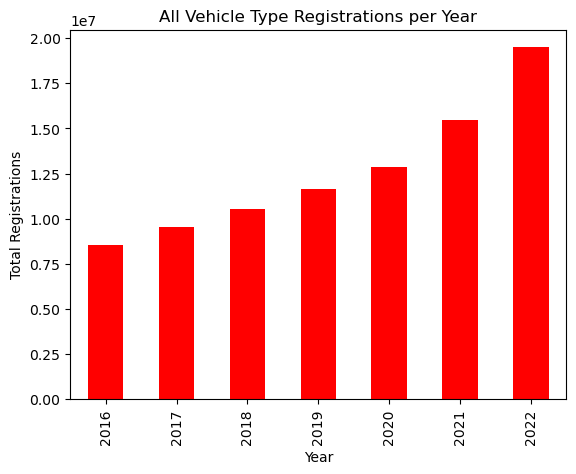

In [137]:

bar_chart = ev_sum.plot.bar(color='r')
plt.xlabel("Year")
plt.ylabel("Total Registrations")
plt.title("All Vehicle Type Registrations per Year")
plt.show()

In [138]:
#Gas/Diesel bar plot showing the total number of rows using pyplot.
gas_sum = reduced_registration_data_df["Total Gasoline/Diesel Registrations"].groupby(reduced_registration_data_df["Year"]).sum()
gas_mean = reduced_registration_data_df["Total Gasoline/Diesel Registrations"].groupby(reduced_registration_data_df["Year"]).mean()
gas_median = reduced_registration_data_df["Total Gasoline/Diesel Registrations"].groupby(reduced_registration_data_df["Year"]).median()
gas_var = reduced_registration_data_df["Total Gasoline/Diesel Registrations"].groupby(reduced_registration_data_df["Year"]).var()
gas_std = reduced_registration_data_df["Total Gasoline/Diesel Registrations"].groupby(reduced_registration_data_df["Year"]).std()
gas_sem = reduced_registration_data_df["Total Gasoline/Diesel Registrations"].groupby(reduced_registration_data_df["Year"]).sem()


gas_stat_summary = pd.DataFrame({
                             "Sum of Gas/Diesel Registration" : gas_sum,
                             "Mean of Gas/Diesel Registrations" : gas_mean,
                             "Median of Gas/Diesel Registrations" : gas_median,
                             "Var of Gas/Diesel Registrations" : gas_var,
                             "Std.Dev Gas/Diesel EV Registrations" : gas_std,
                             "Std. Gas/Diesel of EV Registrations" : gas_sem})

gas_stat_summary


,Sum of Gas/Diesel Registration,Mean of Gas/Diesel Registrations,Median of Gas/Diesel Registrations,Var of Gas/Diesel Registrations,Std.Dev Gas/Diesel EV Registrations,Std. Gas/Diesel of EV Registrations
Year,,,,,,
2016,465178200,8.945735e+06,3424750.0,1.024185e+15,3.200289e+07,4.438003e+06
2017,471063000,9.058904e+06,3426750.0,1.050697e+15,3.241445e+07,4.495075e+06
2018,474707800,9.128996e+06,3423850.0,1.067356e+15,3.267041e+07,4.530571e+06
2019,479819400,9.227296e+06,3427050.0,1.091099e+15,3.303178e+07,4.580684e+06
2020,481705400,9.263565e+06,3365950.0,1.100255e+15,3.317009e+07,4.599863e+06
2021,495619600,9.531146e+06,3558650.0,1.164640e+15,3.412682e+07,4.732539e+06
2022,497059600,9.558838e+06,3585100.0,1.172183e+15,3.423715e+07,4.747839e+06


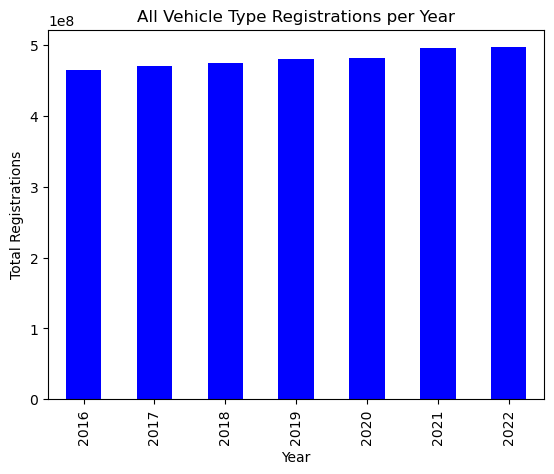

In [139]:
bar_chart = gas_sum.plot.bar(color='b')
plt.xlabel("Year")
plt.ylabel("Total Registrations")
plt.title("All Vehicle Type Registrations per Year")
plt.show()

In [140]:
ev_sum.head()

Year
2016     8551800
2017     9515400
2018    10552600
2019    11666200
2020    12854000
Name: Total EV Registrations, dtype: int64

In [141]:
# EV sum diff YoY
ev_sum_diff = np.diff(np.array(ev_sum))
ev_sum_diff_perc = ev_sum_diff / np.array(ev_sum)[:-1] * 100
ev_sum_diff_perc


array([11.26780327, 10.9002249 , 10.55284953, 10.18155012, 20.32052279,
       26.03776025])

In [142]:
gas_sum.head()

Year
2016    465178200
2017    471063000
2018    474707800
2019    479819400
2020    481705400
Name: Total Gasoline/Diesel Registrations, dtype: int64

In [143]:
# Fossil fuel sum diff YoY
gas_sum_diff = np.diff(np.array(gas_sum))
gas_sum_diff_perc = gas_sum_diff / np.array(gas_sum)[:-1] * 100
gas_sum_diff_perc

array([1.26506358, 0.77373939, 1.07678871, 0.39306456, 2.88852896,
       0.29054541])

In [144]:
ev_sum_regis_break = reduced_registration_data_df.groupby('Year').sum()
ev_sum_regis_break

,Electric (EV),Plug-In Hybrid Electric (PHEV),Hybrid Electric (HEV),Gasoline,Diesel,Total Registrations,Total EV Registrations,Total Gasoline/Diesel Registrations,EV Registration Rate %,Gas/Diesel Registration Rate %
Year,,,,,,,,,,
2016,560600,508000,7483200,449710200,15468000,999289432,8551800,465178200,38.011054,2414.424054
2017,754200,689200,8072000,454831400,16231600,1017390284,9515400,471063000,41.447156,2401.553756
2018,1145200,922600,8484800,458148200,16559600,1029777536,10552600,474707800,44.986931,2391.557462
2019,1567200,1073200,9025800,462717600,17101800,1044508388,11666200,479819400,48.947615,2383.733838
2020,2037800,1188800,9627400,463984400,17721000,1051262840,12854000,481705400,53.919145,2377.768094
2021,2908800,1573600,10983600,481399000,14220600,1072955092,15466000,495619600,64.326627,2398.804574
2022,4884600,2024800,12583600,482745800,14313800,1083675744,19493000,497059600,80.164837,2384.259500


In [145]:
ev_sum_regis_break['Electric (EV)']

Year
2016     560600
2017     754200
2018    1145200
2019    1567200
2020    2037800
2021    2908800
2022    4884600
Name: Electric (EV), dtype: int64

In [146]:
ev_sum_regis_break['Plug-In Hybrid Electric (PHEV)']

Year
2016     508000
2017     689200
2018     922600
2019    1073200
2020    1188800
2021    1573600
2022    2024800
Name: Plug-In Hybrid Electric (PHEV), dtype: int64

In [147]:
ev_sum_regis_break['Hybrid Electric (HEV)']

Year
2016     7483200
2017     8072000
2018     8484800
2019     9025800
2020     9627400
2021    10983600
2022    12583600
Name: Hybrid Electric (HEV), dtype: int64

In [148]:
np.diff(np.array(ev_sum_regis_break['Electric (EV)']))/np.array(ev_sum_regis_break['Electric (EV)'])[:-1] * 100

array([34.5344274 , 51.84301246, 36.84945861, 30.02807555, 42.74217293,
       67.92491749])

In [149]:
np.diff(np.array(ev_sum_regis_break['Plug-In Hybrid Electric (PHEV)']))/np.array(ev_sum_regis_break['Plug-In Hybrid Electric (PHEV)'])[:-1] * 100

array([35.66929134, 33.86535113, 16.32343377, 10.77152441, 32.36877524,
       28.67310625])

In [150]:
np.diff(np.array(ev_sum_regis_break['Hybrid Electric (HEV)']))/np.array(ev_sum_regis_break['Hybrid Electric (HEV)'])[:-1] * 100

array([ 7.86829164,  5.11397423,  6.37610786,  6.66533714, 14.08687704,
       14.56717288])

In [151]:
# Year, ranges list
year = [2016, 2017, 2018, 2019, 2020, 2021, 2022]
avg_range = [145, 151, 189, 209, 210, 217, 276]
max_range = [315, 335, 335, 370, 402, 520, 520]

In [152]:
year_range_df = pd.DataFrame({
                             "Year" : year,
                             "Average Range" : avg_range,
                             "Maximum Range" : max_range,
                            })
year_range_df

,Year,Average Range,Maximum Range
0,2016,145,315
1,2017,151,335
2,2018,189,335
3,2019,209,370
4,2020,210,402
5,2021,217,520
6,2022,276,520


In [153]:
year_range_df.set_index("Year")

,Average Range,Maximum Range
Year,,
2016,145,315
2017,151,335
2018,189,335
2019,209,370
2020,210,402
2021,217,520
2022,276,520


In [154]:
ev_sum_regis_merged = ev_sum_regis_break.merge(year_range_df, on='Year')
ev_sum_regis_merged

,Year,Electric (EV),Plug-In Hybrid Electric (PHEV),Hybrid Electric (HEV),Gasoline,Diesel,Total Registrations,Total EV Registrations,Total Gasoline/Diesel Registrations,EV Registration Rate %,Gas/Diesel Registration Rate %,Average Range,Maximum Range
0,2016,560600,508000,7483200,449710200,15468000,999289432,8551800,465178200,38.011054,2414.424054,145,315
1,2017,754200,689200,8072000,454831400,16231600,1017390284,9515400,471063000,41.447156,2401.553756,151,335
2,2018,1145200,922600,8484800,458148200,16559600,1029777536,10552600,474707800,44.986931,2391.557462,189,335
3,2019,1567200,1073200,9025800,462717600,17101800,1044508388,11666200,479819400,48.947615,2383.733838,209,370
4,2020,2037800,1188800,9627400,463984400,17721000,1051262840,12854000,481705400,53.919145,2377.768094,210,402
5,2021,2908800,1573600,10983600,481399000,14220600,1072955092,15466000,495619600,64.326627,2398.804574,217,520
6,2022,4884600,2024800,12583600,482745800,14313800,1083675744,19493000,497059600,80.164837,2384.259500,276,520


In [108]:
# Add in YoY growth %
# line plot for comparison between vehicle types


In [155]:
# Reduced to 2022
ev_sum_regis_merged_2022 = reduced_registration_data_df[reduced_registration_data_df["Year"] == 2022]
ev_sum_regis_merged_2022.head()

,Year,State,Electric (EV),Plug-In Hybrid Electric (PHEV),Hybrid Electric (HEV),Gasoline,Diesel,Total Registrations,Total EV Registrations,Total Gasoline/Diesel Registrations,EV Registration Rate %,Gas/Diesel Registration Rate %
0,2022,Alabama,8700,4400,50800,4077100,126100,9064622,63900,4203200,0.704938,46.369280
1,2022,Alaska,2000,700,9000,457100,30500,1063422,11700,487600,1.100222,45.851976
2,2022,Arizona,65800,20400,150800,5476100,198700,12404322,237000,5674800,1.910624,45.748571
3,2022,Arkansas,5100,2500,30600,2229500,89700,5044822,38200,2319200,0.757212,45.971890
4,2022,California,903600,361100,1514000,31059000,725300,70684822,2778700,31784300,3.931113,44.966231


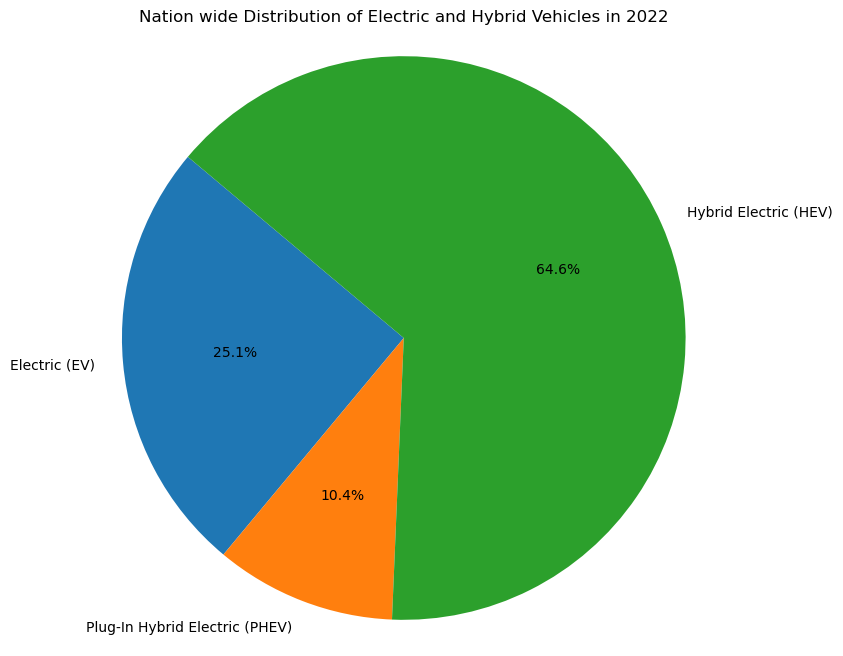

In [156]:

# Add pyplot
ev_sum_regis_columns = ['Electric (EV)', 'Plug-In Hybrid Electric (PHEV)', 'Hybrid Electric (HEV)']

# Sum the values for each vehicle type
ev_sum_regis_sums = ev_sum_regis_merged_2022[ev_sum_regis_columns].sum()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(ev_sum_regis_sums, labels=ev_sum_regis_sums.index, autopct='%1.1f%%', startangle=140)
plt.title('Nation wide Distribution of Electric and Hybrid Vehicles in 2022')

plt.axis('equal')  
plt.show()

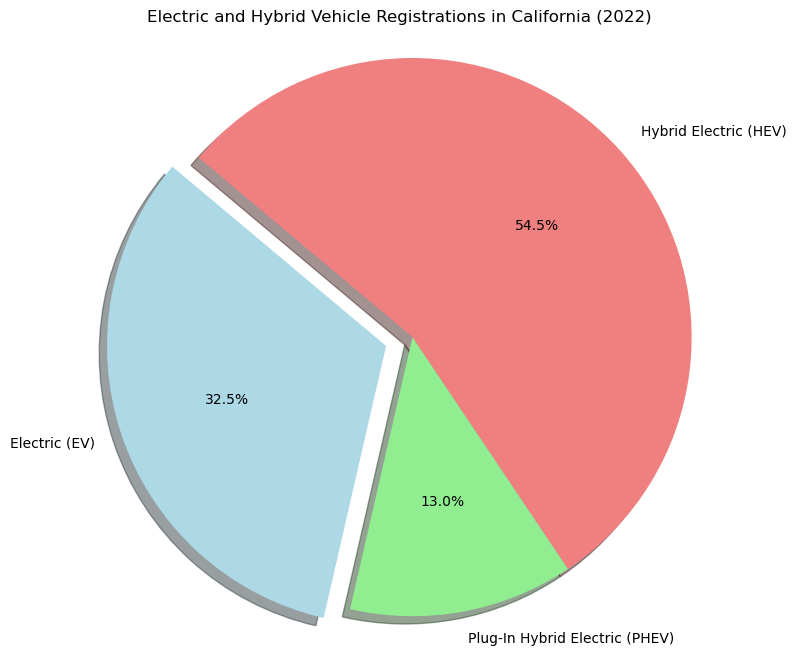

In [157]:
# Add pyplot
california_2022 = reduced_registration_data_df[(reduced_registration_data_df["State"] == "California") & (reduced_registration_data_df["Year"] == 2022)]

# Data
labels = ['Electric (EV)', 'Plug-In Hybrid Electric (PHEV)', 'Hybrid Electric (HEV)']
sizes = [903600, 361100, 1514000]
colors = ['lightblue', 'lightgreen', 'lightcoral']
explode = (0.1, 0, 0)  # Explode the first slice (Electric (EV))

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Electric and Hybrid Vehicle Registrations in California (2022)')
plt.show()

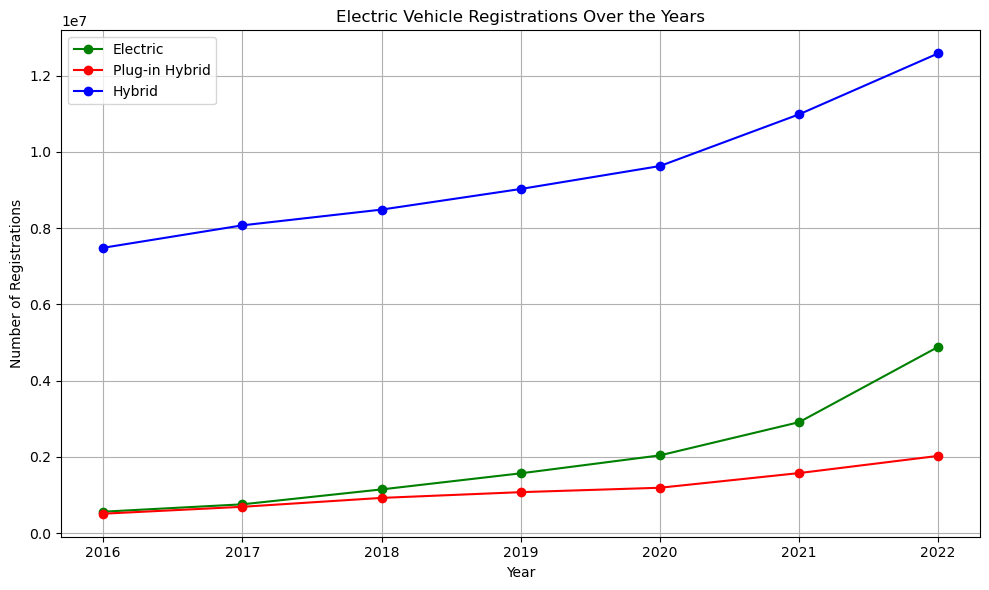

In [158]:
# Add pyplot
ev_registrations = reduced_registration_data_df.groupby('Year')['Electric (EV)'].sum()
phev_registrations = reduced_registration_data_df.groupby('Year')['Plug-In Hybrid Electric (PHEV)'].sum()
hev_registrations = reduced_registration_data_df.groupby('Year')['Hybrid Electric (HEV)'].sum()

plt.figure(figsize=(10, 6))
plt.plot(ev_registrations.index, ev_registrations.values, marker='o', color='green',label='Electric')
plt.plot(phev_registrations.index, phev_registrations.values, marker='o', color='red',label= 'Plug-in Hybrid')
plt.plot(hev_registrations.index, hev_registrations.values, marker='o', color='blue',label='Hybrid')
plt.plot

plt.xlabel('Year')
plt.ylabel('Number of Registrations')
plt.title('Electric Vehicle Registrations Over the Years')
plt.grid(True)
plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [159]:
# Calculate the percentage change in EV registrations year-on-year
percentage_change_ev = np.diff(np.array(ev_sum_regis_break['Electric (EV)']))/np.array(ev_sum_regis_break['Electric (EV)'])[:-1] * 100
percentage_change_ev

array([34.5344274 , 51.84301246, 36.84945861, 30.02807555, 42.74217293,
       67.92491749])

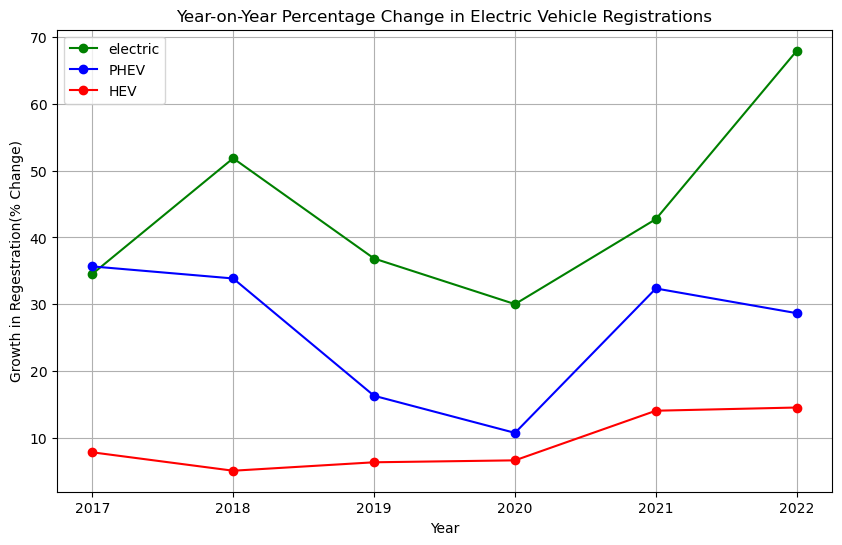

In [160]:
#calculating percent change of different types of vehicle registrations (Electric, Plug-In Hybrid Electric - PHEV, and Hybrid Electric - HEV) over the years
percentage_change_ev = np.diff(np.array(ev_sum_regis_break['Electric (EV)'])) / np.array(ev_sum_regis_break['Electric (EV)'])[:-1] * 100
percentage_change_plug_in = np.diff(np.array(ev_sum_regis_break['Plug-In Hybrid Electric (PHEV)'])) / np.array(ev_sum_regis_break['Plug-In Hybrid Electric (PHEV)'])[:-1] * 100
percentage_change_hybrid = np.diff(np.array(ev_sum_regis_break['Hybrid Electric (HEV)'])) / np.array(ev_sum_regis_break['Hybrid Electric (HEV)'])[:-1] * 100

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(ev_sum_regis_break.index[1:], percentage_change_ev, marker='o', color='green',label='electric')   #selecting the index values (years) of the df ev_sum_regis_break starting from the second year (index 1) onward.
plt.plot(ev_sum_regis_break.index[1:], percentage_change_plug_in, marker='o', color='blue',label='PHEV')   #This is done to exclude the first year because the percentage change calculation involves differences between consecutive years.
plt.plot(ev_sum_regis_break.index[1:], percentage_change_hybrid, marker='o', color='red',label='HEV')

plt.xlabel('Year')
plt.ylabel('Growth in Regestration(% Change)')
plt.title('Year-on-Year Percentage Change in Electric Vehicle Registrations')
plt.grid(True)
plt.legend()
plt.show()


In [161]:
#  2016 - 2022 Narrowing down to highest registration count of EVs
ev_sum_state = reduced_registration_data_df["Total EV Registrations"].groupby(reduced_registration_data_df["State"]).sum()
ev_sum_state

State
Alabama                   290800
Alaska                     52700
Arizona                  1048000
Arkansas                  178700
California              12871000
Colorado                  916000
Connecticut               457700
Delaware                  123100
District of Columbia      127700
Florida                  2341900
Georgia                  1012500
Hawaii                    275900
Idaho                     194500
Illinois                 1561000
Indiana                   595600
Iowa                      281300
Kansas                    268500
Kentucky                  317700
Louisiana                 177800
Maine                     185600
Maryland                  960700
Massachusetts            1081700
Michigan                  803400
Minnesota                 664700
Mississippi               120000
Missouri                  679700
Montana                    94800
Nebraska                  158300
Nevada                    403300
New Hampshire             198800
New 

In [162]:
ev_price_df = pd.read_csv(EV_Prices).dropna(how='all')
ev_price_df

,Brand,Model,MSRP,Dest Chrg,Tax Credit (kWh),After Tax,Range,Type
0,Lucid,"Air Dream Edition Range 19"" (2022)","169,000","1,500","7,500","163,000",520,EV
1,Lucid,"Air Grand Touring 19"" (2022)","139,000","1,500","7,500","133,000",516,EV
2,Lucid,"Air Dream Edition Range 21"" (2022)","169,000","1,500","7,500","163,000",481,EV
3,Lucid,"Air Dream Edition Performance 19"" (202.2)","169,000","1,500","7,500","163,000",471,EV
4,Lucid,"Air Grand Touring 21"" (2022)","139,000","1,500","7,500","133,000",469,EV
...,...,...,...,...,...,...,...,...
155,NaN,2018,189,335,NaN,NaN,NaN,NaN
156,NaN,2019,209,370,NaN,NaN,NaN,NaN
157,NaN,2020,210,402,NaN,NaN,NaN,NaN
158,NaN,2021,217,520,NaN,NaN,NaN,NaN


In [163]:
## dictionary of state abbr to state for referencing etc.
states = {
    'AK': 'Alaska',
    'AL': 'Alabama',
    'AR': 'Arkansas',
    'AZ': 'Arizona',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DC': 'District of Columbia',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'IA': 'Iowa',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'MA': 'Massachusetts',
    'MD': 'Maryland',
    'ME': 'Maine',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MO': 'Missouri',
    'MS': 'Mississippi',
    'MT': 'Montana',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'NE': 'Nebraska',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NV': 'Nevada',
    'NY': 'New York',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VA': 'Virginia',
    'VT': 'Vermont',
    'WA': 'Washington',
    'WI': 'Wisconsin',
    'WV': 'West Virginia',
    'WY': 'Wyoming'
}

In [165]:
location_df  = pd.read_csv(fuel_stations)

location_df = location_df.loc[location_df['State'].dropna().index] ### drop missing entries only in State column
drop_state = [i for i in location_df['State'].unique() if i not in states.keys()] ### get list of states to drop using state dictionary
for st in drop_state:
    location_df.drop(location_df[location_df['State'] == st].index,inplace = True)

lats = location_df.groupby('State').mean()['Latitude']
long = location_df.groupby('State').mean()['Longitude']
count = location_df.groupby('State').count()['Fuel Type Code']

map_df = pd.DataFrame([count,long,lats]).T.reset_index() ## T transposes dataframe, switches columns and index values
map_df = map_df.rename(columns = {'Fuel Type Code':'Count','State':'State Abbr'})
## Set Index to match registration df
map_df['State'] = [states[i] for i in map_df['State Abbr']]



colors = 'State'
size = 'Count'
xlab = 'x'
ylab = 'y'
fh = 500
fw = 700
map_df.hvplot.points(x='Longitude',y='Latitude',geo = True,xlabel=xlab,ylabel = ylab,c= colors,s = size,frame_height = fh,frame_width=fw,alpha = 0.75,tiles='StamenTonerBackground',scale = 0.5)

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Longitude,Latitude]   (State,Count)

The r is: 0.9801928736245888


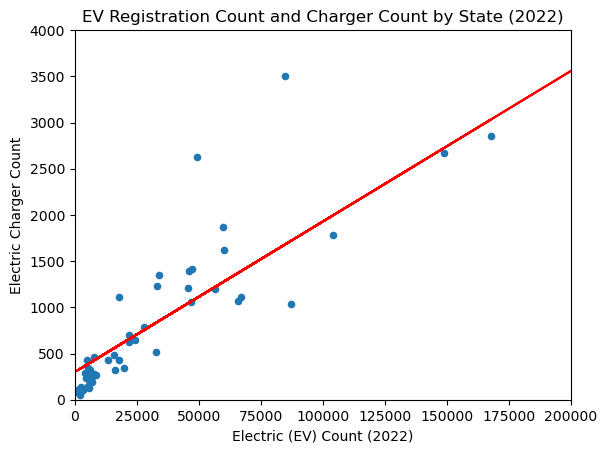

In [167]:
## Filter for only 2022 registration numbers and merge with map df
agg_data = reduced_registration_data_df[reduced_registration_data_df['Year'] == 2022]
agg_data = agg_data.merge(map_df,on='State')

## Calculate Correlation
x = np.array(agg_data['Electric (EV)'])
y = np.array(agg_data['Count'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = np.array(x) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

## Plot EV Registration Count and Charger Count
agg_data.plot(kind='scatter',x='Electric (EV)',y = 'Count')
plt.plot(x,regress_values,"r-")
plt.xlabel('Electric (EV) Count (2022)')
plt.ylabel('Electric Charger Count')
plt.title('EV Registration Count and Charger Count by State (2022)')
print(f"The r is: {rvalue}")
plt.ylim(0,4000)
plt.xlim(0,0.2*1000000)
plt.show()

- California has a far greater number of ev car registrations and ev chargers. The scatter plot is zoomed in to clearly show the correlation among the 49 remaining states.

In [174]:
## Load in zipcodes and filter for CA
zipcodes = pd.read_csv(zipcodes)
ca_zip = zipcodes[zipcodes['state']=='CA']
ca_zip.rename(columns = {'zip':'ZIP'},inplace = True)

## Filter out chargers for CA
ca_df = location_df[location_df['State'] == 'CA']
ca_df = ca_df.merge(ca_zip[['ZIP','county']],on = 'ZIP')
ca_zip_loc = pd.DataFrame(ca_zip.groupby('county').mean()[['latitude','longitude']])

colors = 'county'
xlab = 'x'
ylab = 'y'
fh = 500
fw = 700

ca_df.hvplot.points(x='Longitude',y='Latitude',geo = True,xlabel=xlab,ylabel = ylab,c= colors,frame_height = fh,frame_width=fw,alpha = 0.75,tiles='EsriStreet')

TypeError: argument of type 'method' is not iterable

In [175]:
## Merge Zip code location and counts 
county_cnt = pd.DataFrame(ca_df.groupby('county').count()['State'])
county_df = county_cnt.merge(ca_zip_loc,on='county').reset_index().rename(columns={'State':'Charger Count'})
colors = 'county'
size = 'Charger Count'
xlab = 'x'
ylab = 'y'
fh = 500
fw = 700

county_df.hvplot.points(x='longitude',y='latitude',geo = True,xlabel=xlab,ylabel = ylab,c= colors,s = size,frame_height = fh,frame_width=fw,alpha = 0.75,tiles='EsriStreet')


:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [longitude,latitude]   (county,Charger Count)

In [122]:
## Used to calculate median distance


# from math import sin, cos, sqrt, atan2, radians

# def find_dist(lat1,lon1,lat2,lon2):
#     # Approximate radius of earth in miles
#     R= 3963.19

#     dlat = radians(abs(lat2 - lat1))
#     dlon = radians(abs(lon2 - lon1))
#     lat1 = radians(abs(lat1))
#     lat2 = radians(abs(lat2))

#     a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
#     c = 2 * atan2(sqrt(a), sqrt(1 - a))
#     return R *c

## Get list of distance from charger for each state calculate median (account for skew)
# dist_mean = {}
# dist_median = {}
# for i in location_df['State'].unique():
#     state_df = location_df[location_df['State'] == i]
#     dist_list = []
#     for x1,y1 in zip(state_df['Latitude'],state_df['Longitude']):
#         dist = 100000
#         for x2,y2 in zip(state_df['Latitude'],state_df['Longitude']):
#             pos_dist = find_dist(x1,y1,x2,y2)
#             if pos_dist < dist and x1 != x2 and y1 != y2:
#                 dist = pos_dist
#         dist_list.append(dist)
#     dist_mean[i] = np.mean(dist_list)
#     dist_median[i] = np.median(dist_list)
# mean_df = pd.DataFrame({'State Abbr':dist_mean.keys(),'Mean Charger Distance':dist_mean.values()})
# median_df = pd.DataFrame({'State Abbr':dist_median.keys(),'Mean Charger Distance':dist_median.values()})
# dist_df = mean_df.merge(median_df,on='State Abbr')
# dist_df.to_csv('..\charger_distance.csv',index = False)

The r is: -0.36339267076981246


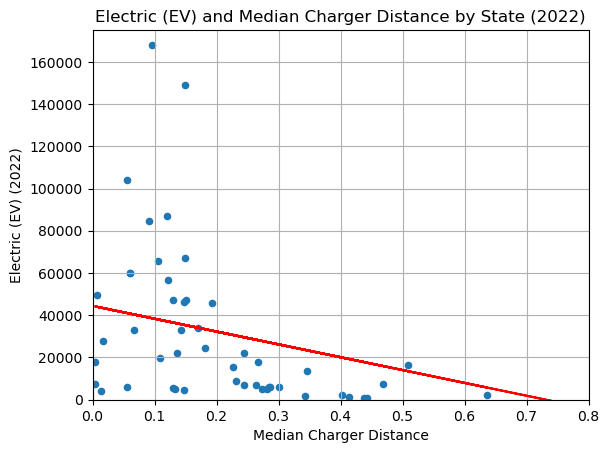

In [171]:
## read in median distances csv
dist_df = pd.read_csv('/Users/flynnlives/Documents/GitHub/UCI_Project_1/Registration_Files/median_charger_distance.csv')
full_df = agg_data.merge(dist_df,on='State Abbr')

## Remove California (outlier)
full_df=full_df[full_df['State'] != 'California']

ycat = 'Electric (EV)'
xcat = 'Median Charger Distance' # can change to "Mean Charger Distance"
# plot ev registration and charger distance
full_df.plot(kind='scatter',y= ycat,x = xcat)
y = np.array(full_df[ycat])
x = np.array(full_df[xcat])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = np.array(x) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x,regress_values,"r-")
plt.ylabel(ycat+ ' (2022)')
plt.xlabel(xcat)
plt.title(f'{ycat} and {xcat} by State (2022)')
plt.grid()
plt.ylim(0,175000)
plt.xlim(0,0.8) # (0,8) if using mean
print(f"The r is: {rvalue}")
plt.show()

In [ ]:
# on buying behavior 